### Load data

In [1]:
import pandas as pd
import numpy as np
import joblib
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from lightgbm.sklearn import LGBMRegressor

In [2]:
# Load dataset 
df = joblib.load('ricci_boltztrap_mp_tabular_merged_with_NaN_v2_ntype_.pkl')

# Define features and target variable
features = joblib.load('features_v2.pkl')
print('No. of features', len(features))

df.head()

No. of features 2497


,minimum_oxidation_state,maximum_oxidation_state,range_oxidation_state,std_dev_oxidation_state,compound_possible,max_ionic_char,avg_ionic_char,avg_anion_electron_affinity,minimum_EN_difference,maximum_EN_difference,...,κₑᵉ.n.T [K],κₑᵉ.n.c [cm⁻³],mₑᶜ.p.ε̄ [mₑ],mₑᶜ.p.ε₁ [mₑ],mₑᶜ.p.ε₂ [mₑ],mₑᶜ.p.ε₃ [mₑ],mₑᶜ.n.ε̄ [mₑ],mₑᶜ.n.ε₁ [mₑ],mₑᶜ.n.ε₂ [mₑ],mₑᶜ.n.ε₃ [mₑ]
mp-1992,0.0,0.0,0.0,0.0,0,0.190712,0.044698,0.0,0.0,0.0,...,100.0,1.000000e+16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mp-27502,0.0,0.0,0.0,0.0,1,0.088829,0.016742,0.0,0.0,0.0,...,100.0,1.000000e+16,9.948649,3.481600,5.835956,20.528390,0.990398,0.581862,1.084788,1.304544
mp-770629,0.0,0.0,0.0,0.0,1,0.779730,0.171021,0.0,0.0,0.0,...,100.0,1.000000e+16,10.016446,7.157813,8.633919,14.257605,3.746585,1.077907,4.539832,5.622017
mp-27202,0.0,0.0,0.0,0.0,0,0.070306,0.004246,0.0,0.0,0.0,...,600.0,1.000000e+16,25.742400,17.822069,20.141565,39.263564,19.824545,15.836995,18.160493,25.476146
mp-559608,0.0,0.0,0.0,0.0,1,0.820234,0.145225,0.0,0.0,0.0,...,100.0,1.000000e+16,91.371212,61.389242,61.389279,151.335114,0.492688,0.485241,0.485241,0.507582


In [3]:
target = 'n_conductivity' #Average eigenvalue of electrical thermal conductivity with electron concentration of 10^-18 carriers/cm^-3 (n-type) at 300K, in [W/K/m/s].

print(target)
print('Max value:', df[target].max())
print('Min value:', df[target].min())

n_conductivity
Max value: 9999123921578508.0
Min value: 715.0361635424184


### Split & Scale Features

In [4]:
!cd

c:\Users\songy\OneDrive\Documents\GBSFS4MPP_local\new_properties\6. ricci_boltztrap_mp_tabular (done)


In [5]:
# Split dataset
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42) 

In [6]:
path = 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties/6. ricci_boltztrap_mp_tabular (done)/'
path_to_save = path + target + '_results/'

# Save unscaled data
joblib.dump(df_train, path_to_save + 'df_train_' + target + '.pkl')
joblib.dump(df_test, path_to_save + 'df_test_' + target + '.pkl')

['C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties/6. ricci_boltztrap_mp_tabular (done)/n_conductivity_results/df_test_n_conductivity.pkl']

In [7]:
# Scale the features
scaling = MinMaxScaler(feature_range=(0, 1))

df_train[features] = pd.DataFrame(
                                    scaling.fit_transform(df_train[features].values),
                                    columns=df_train[features].columns,
                                    index=df_train[features].index
                                )
                                
                                
# Create pandas.Dataframe of scaled test set using scaler as defined using training set
df_test[features] = pd.DataFrame(
                                    scaling.transform(df_test[features].values),
                                    columns=df_test[features].columns,
                                    index=df_test[features].index
                                )

c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\pandas\core\frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\pandas\core\frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [8]:
# Save 
joblib.dump(df_train, path_to_save + 'df_train_' + target + '_scaled.pkl')
joblib.dump(df_test, path_to_save + 'df_test_' + target + '_scaled.pkl')

['C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties/6. ricci_boltztrap_mp_tabular (done)/n_conductivity_results/df_test_n_conductivity_scaled.pkl']

#### GBFS

In [9]:
import sys
sys.path.insert(1, 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties')

import GBFS as gb

import joblib
import pandas as pd
import numpy as np

In [10]:
# Target
target = 'n_conductivity'

# Path to training data
path = 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties/6. ricci_boltztrap_mp_tabular (done)/'
path_to_save = path + target + '_results/'
path_to_file = path_to_save + 'df_train_' + target + '_scaled.pkl'

# Either a list or saved file
features = path + 'features_v2.pkl'

problem = 'regression'

In [11]:
# Initialization 
FS = gb.GBFS(
            path_to_file = path_to_file, 
            path_to_save = path_to_save, 
            target = target,
            features = features,
            oversampled_it = False, 
            problem = problem
            )

Name of target column:  n_conductivity
No. of exploratory features:  2497


In [12]:
# Conduct grid search to perform preliminary scan of the hyperparameter space & retrieve a trained model
FS.run(
        boosting_method = 'lightGBM', 
        cv_folds = 10
        )

Model employed:  lightGBM
Total no. of permutations: 18


   (1 of 18)  Attempt:  [('n_estimators', 100), ('learning_rate', 0.1), ('num_leaves', 30)]
   No. of rows in the training set: 30441
   Metric score:  -297944828567498168039821541376.00000
   [*** Current optimal Hyperparameters ***]
Finished loading model, total used 100 iterations


   (2 of 18)  Attempt:  [('n_estimators', 100), ('learning_rate', 0.1), ('num_leaves', 40)]
   No. of rows in the training set: 30441
   Metric score:  -284921614224529616883964444672.00000
   [*** Current optimal Hyperparameters ***]
Finished loading model, total used 100 iterations


   (3 of 18)  Attempt:  [('n_estimators', 100), ('learning_rate', 0.1), ('num_leaves', 50)]
   No. of rows in the training set: 30441
   Metric score:  -268500773444706442882901344256.00000
   [*** Current optimal Hyperparameters ***]
Finished loading model, total used 100 iterations


   (4 of 18)  Attempt:  [('n_estimators', 100), ('learning_rate', 0.2), ('num_lea

LGBMRegressor(importance_type='gain', num_leaves=50, objective='regression')

Result saved as: feature_relevance_score_n_conductivity.pkl
Figure saved as: feature_relevance_plot_n_conductivity.png


,feature,relevance_score
0,max_packing_efficiency,6.670219e+34
1,MagpieData_maximum_MendeleevNumber,8.961378e+33
2,total_e,7.569136e+33
3,MEGNetElementData_minimum_embedding_10,4.727319e+33
4,jml_vpa,3.349947e+33
...,...,...
2492,jml_mean_charge_326,0.000000e+00
2493,jml_mean_charge_325,0.000000e+00
2494,jml_mean_charge_324,0.000000e+00
2495,jml_mean_charge_323,0.000000e+00


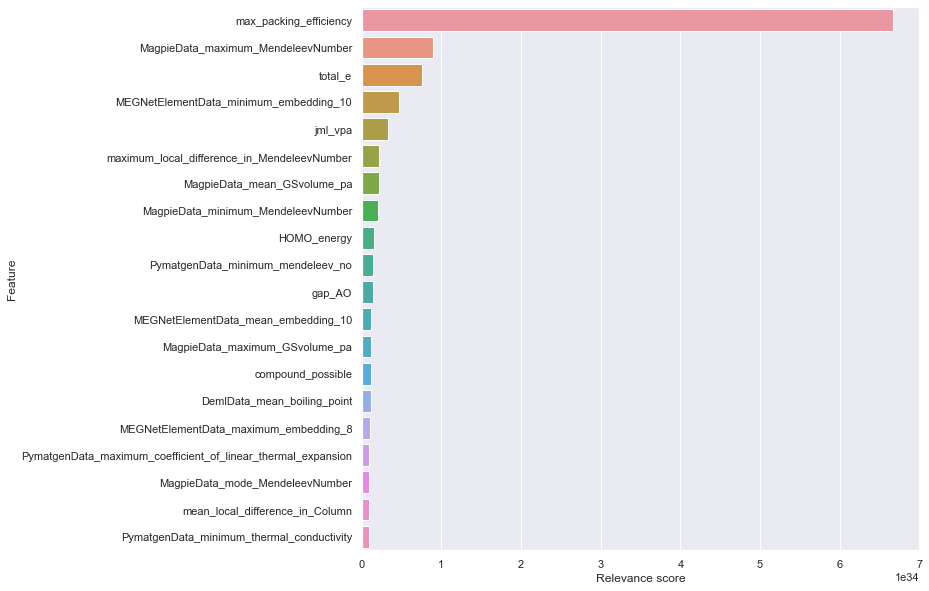

In [13]:
# Obtain feature relevance score
FS.feature_relevance(
                    plot = True, 
                    no_of_features = 20
                    )

In [14]:
# Perform recursive feature selection 
FS.recursive_selection(
                    stratify = False, 
                    oversample_technique = None, 
                    chosen_metric = 'rmse',
                    average = 'weighted',
                    no_to_terminate = 200,
                    max_no_imp = 10
                    )

   No. of rows in training set:  30441
No. of features considering:  1

n=1: mae_train=329328693692896.6875, mae_validation=328198068335788.1250 
n=1: mse_train=604113413900340958108749660160.0000, mse_validation=583751709681790592044100485120.0000 
n=1: rmse_train=777247331227545.0000, rmse_validation=764036458345929.0000 
n=1: r2_train=0.4756, r2_validation=0.4524 
n=1: max_error_train=9010288075329648.0000, max_error_validation=8836230450868626.0000 
--- 0.5885348320007324 seconds --- 

No. of features considering:  2

n=2: mae_train=279900368312885.8750, mae_validation=293618442666014.9375 
n=2: mse_train=474301532610724767882721361920.0000, mse_validation=525950227385411426950116802560.0000 
n=2: rmse_train=688695529686903.6250, rmse_validation=725224260064024.2500 
n=2: r2_train=0.5883, r2_validation=0.5066 
n=2: max_error_train=8917731070909993.0000, max_error_validation=8874159481002297.0000 
--- 0.16214752197265625 seconds --- 

No. of features considering:  3

n=3: mae_train=

,train_mae,va_mae,train_mse,va_mse,train_rmse,va_rmse,train_r_sq,va_r_sq,train_max_error,va_max_error
no_of_features,,,,,,,,,,
1,3.293287e+14,3.281981e+14,6.041134e+29,5.837517e+29,7.772473e+14,7.640365e+14,0.475582,0.452385,9.010288e+15,8.836230e+15
2,2.799004e+14,2.936184e+14,4.743015e+29,5.259502e+29,6.886955e+14,7.252243e+14,0.588269,0.506608,8.917731e+15,8.874159e+15
3,2.412695e+14,2.696929e+14,3.477495e+29,4.861865e+29,5.897029e+14,6.972708e+14,0.698126,0.543910,7.383525e+15,8.911206e+15
4,2.233757e+14,2.609641e+14,2.884057e+29,4.487962e+29,5.370342e+14,6.699226e+14,0.749641,0.578986,7.303812e+15,9.346409e+15
5,1.997610e+14,4.135889e+14,2.292504e+29,7.647166e+29,4.788010e+14,8.744808e+14,0.800993,0.282622,6.518813e+15,7.017437e+15
...,...,...,...,...,...,...,...,...,...,...
195,1.039826e+14,2.143152e+14,5.028373e+28,2.290759e+29,2.242403e+14,4.786187e+14,0.956350,0.785105,4.345216e+15,5.167604e+15
196,1.040044e+14,2.163246e+14,5.095404e+28,2.325020e+29,2.257300e+14,4.821847e+14,0.955768,0.781891,4.699882e+15,5.195007e+15
197,1.037060e+14,2.142100e+14,5.128592e+28,2.288635e+29,2.264640e+14,4.783968e+14,0.955480,0.785304,4.565965e+15,5.472321e+15


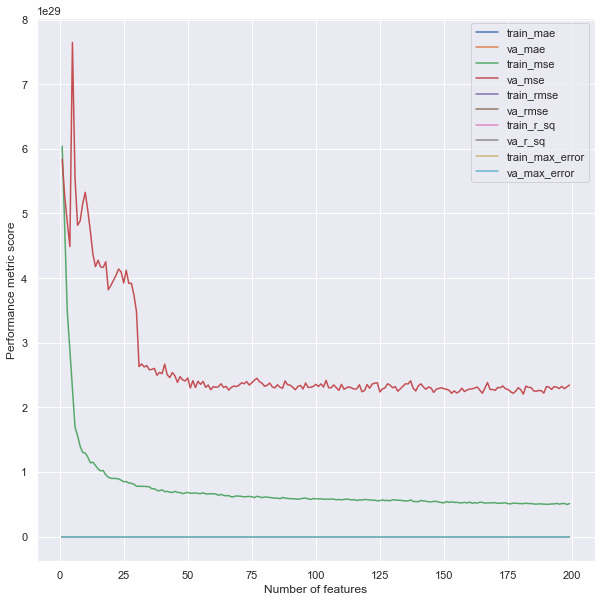

Result saved as: GBFS_convergence_plot_n_conductivity.png


<Figure size 720x720 with 0 Axes>

In [15]:
# Plot the result
FS.convergence_plot()

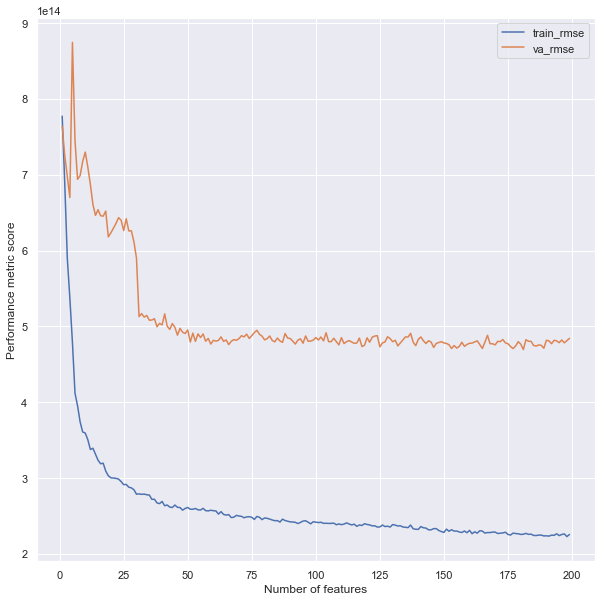

Result saved as: GBFS_convergence_plot_n_conductivity.png


<Figure size 720x720 with 0 Axes>

In [16]:
# Plot the result
FS.convergence_plot(
                    train_metric = 'train_rmse',
                    validation_metric = 'va_rmse'
                    )

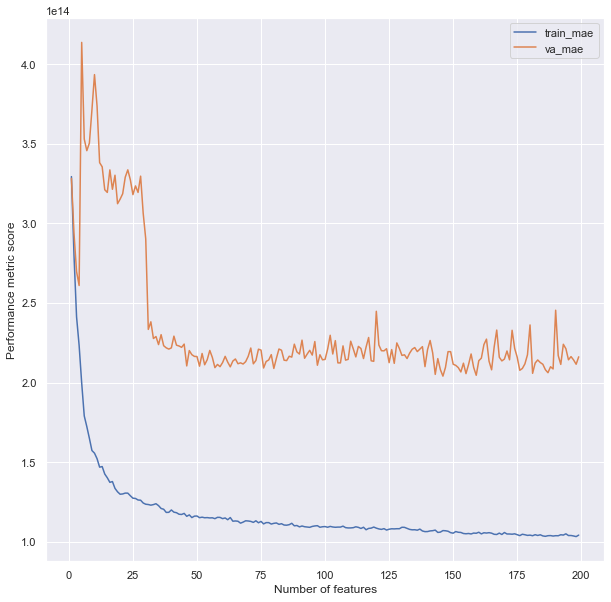

Result saved as: GBFS_convergence_plot_n_conductivity.png


<Figure size 720x720 with 0 Axes>

In [17]:
# Plot the result
FS.convergence_plot(
                    train_metric = 'train_mae',
                    validation_metric = 'va_mae'
                    )

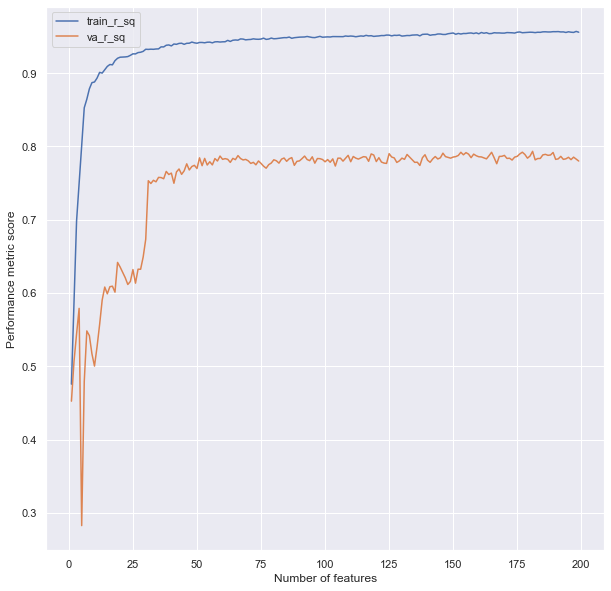

Result saved as: GBFS_convergence_plot_n_conductivity.png


<Figure size 720x720 with 0 Axes>

In [18]:
# Plot the result
FS.convergence_plot(
                    train_metric = 'train_r_sq',
                    validation_metric = 'va_r_sq'
                    )

In [19]:
# # Plot the result
# FS.convergence_plot(
#                     train_metric = ['train_r_sq', 'train_rmse', 'train_mae'],
#                     validation_metric = ['va_r_sq', 'va_rmse', 'va_mae']
#                     )

##### Statistical Analyses - Regression

In [20]:
import sys
sys.path.insert(1, 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties')

import feature_analyses as fa

import joblib
import pandas as pd
import numpy as np

In [21]:
# Target
target = 'n_conductivity'

# Path to training data
path = 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties/6. ricci_boltztrap_mp_tabular (done)/'
path_to_save = path + target + '_results/'
path_to_file = path_to_save + 'df_train_' + target + '_scaled.pkl'

# Either a list or saved file
features = path + 'features_v2.pkl'

problem = 'regression'

In [22]:
# Initialization 
analyses = fa.perform(
                    path_to_file = path_to_file, 
                    path_to_save = path_to_save, 
                    target = target,
                    features = features
                    )

Name of target column:  n_conductivity
No. of exploratory features:  2497


In [23]:
df = analyses.remove_constant_features()
df.head()

No. of features removed:  38
No. of exploratory features:  2459


,compound_possible,max_ionic_char,avg_ionic_char,H,He,Li,Be,B,C,N,...,LUMO_element_ohe_Zn,LUMO_element_ohe_Zr,crystal_system_ohe_cubic,crystal_system_ohe_hexagonal,crystal_system_ohe_monoclinic,crystal_system_ohe_orthorhombic,crystal_system_ohe_tetragonal,crystal_system_ohe_triclinic,crystal_system_ohe_trigonal,n_conductivity
mp-774362,1.0,0.846198,0.676078,0.000,0.0,0.166667,0.0,0.166667,0.0,0.00,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.046662e+11
mp-766452,1.0,0.809174,0.772548,0.000,0.0,0.000000,0.0,0.000000,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.131230e+13
mp-795616,0.0,0.593746,0.543455,0.000,0.0,0.000000,0.0,0.000000,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.904650e+11
mp-30326,0.0,0.068323,0.051389,0.000,0.0,0.000000,0.0,0.000000,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,6.645587e+14
mp-27235,1.0,0.593746,0.322122,0.625,0.0,0.000000,0.0,0.000000,0.0,0.25,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.310306e+11


In [24]:
df_anova = analyses.ANOVA_F_test(
                                problem='regression', 
                                all_features=False, 
                                csv=False
                                )

df_anova

There are:
No. of categorical features:  187
No. of numerical features:  2272 

Considering only the numerical features. 

Result saved as:  ANOVA_F_test_result_n_conductivity_regression.pkl


,feature_names,f_statistic,f_statistic_scaled
0,MagpieData_maximum_NpValence,18809.844509,1.000000e+00
1,max_packing_efficiency,17654.415060,9.385732e-01
2,MEGNetElementData_minimum_embedding_7,16118.717643,8.569299e-01
3,MagpieData_range_NpValence,15270.183327,8.118187e-01
4,PymatgenData_maximum_mendeleev_no,15163.889791,8.061677e-01
...,...,...,...
2267,PymatgenData_range_atomic_mass,0.000661,3.503925e-08
2268,jml_mean_charge_267,0.000318,1.683671e-08
2269,jml_nn_79,0.000264,1.395155e-08
2270,jml_is_noble_gas,0.000006,2.101952e-10


In [25]:
df_mi = analyses.mutual_information(
                                problem='regression', 
                                csv=False
                                )

df_mi

There are:
No. of categorical features:  187
No. of numerical features:  2272 

Result saved as: MI_result_n_conductivity.pkl


,feature_names,MI,MI_scaled
0,jml_voro_coord_divi_therm_cond,0.611313,1.000000
1,jml_atom_rad_divi_therm_cond,0.610421,0.998540
2,jml_first_ion_en_divi_mp,0.608121,0.994779
3,jml_mol_vol_divi_bp,0.604320,0.988561
4,jml_mol_vol_divi_therm_cond,0.601235,0.983515
...,...,...,...
2451,jml_C22,0.000000,0.000000
2449,jml_C15,0.000000,0.000000
2448,HOMO_element_ohe_Ag,0.000000,0.000000
2447,Ar,0.000000,0.000000


#### Feature Engineering 

In [26]:
import sys
sys.path.insert(1, 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties')

import feature_engineering as fe

import joblib
import pandas as pd
import numpy as np

In [27]:
# Target
target = 'n_conductivity'

# Path to training data
path = 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties/6. ricci_boltztrap_mp_tabular (done)/'
path_to_save = path + target + '_results/'
path_to_file = path + 'ricci_boltztrap_mp_tabular_merged_with_NaN_v2_ntype_.pkl'  # all data

# Either a list or saved file for the features
features = path + 'features_v2.pkl'

problem = 'regression'

In [28]:
# Top n features from ANOVA 
df_anova = joblib.load(path_to_save + 'ANOVA_F_test_result_' + target + '_regression.pkl')

# Top n features
n = 5
anova_features = df_anova['feature_names'].tolist()[:n]

df_anova.iloc[:n, :]

,feature_names,f_statistic,f_statistic_scaled
0,MagpieData_maximum_NpValence,18809.844509,1.000000
1,max_packing_efficiency,17654.415060,0.938573
2,MEGNetElementData_minimum_embedding_7,16118.717643,0.856930
3,MagpieData_range_NpValence,15270.183327,0.811819
4,PymatgenData_maximum_mendeleev_no,15163.889791,0.806168


In [29]:
# Top n features from MI 
df_mi = joblib.load(path_to_save + 'MI_result_' + target + '.pkl')

# Top n features
n = 5
mi_features = df_mi['feature_names'].tolist()[:n]

df_mi.iloc[:n, :]

,feature_names,MI,MI_scaled
0,jml_voro_coord_divi_therm_cond,0.611313,1.000000
1,jml_atom_rad_divi_therm_cond,0.610421,0.998540
2,jml_first_ion_en_divi_mp,0.608121,0.994779
3,jml_mol_vol_divi_bp,0.604320,0.988561
4,jml_mol_vol_divi_therm_cond,0.601235,0.983515


In [30]:
# Top n features from GBFS
df_gbfs = joblib.load(path_to_save + 'feature_relevance_score_' + target + '.pkl')

# Top n features
n = 5
gbfs_features = df_gbfs['feature'].tolist()[:n]

df_gbfs.iloc[:n, :]

,feature,relevance_score
0,max_packing_efficiency,6.670219e+34
1,MagpieData_maximum_MendeleevNumber,8.961378e+33
2,total_e,7.569136e+33
3,MEGNetElementData_minimum_embedding_10,4.727319e+33
4,jml_vpa,3.349947e+33


In [31]:
# Initialization
perform = fe.engineering(
                        path_to_file = path_to_file, 
                        path_to_save = path_to_save, 
                        target = target,
                        features = features
                        )

Name of target column:  n_conductivity
No. of exploratory features:  2497


In [32]:
# Join the features
feature_list = anova_features + mi_features + gbfs_features

print(len(feature_list))
print(feature_list)

15
['MagpieData_maximum_NpValence', 'max_packing_efficiency', 'MEGNetElementData_minimum_embedding_7', 'MagpieData_range_NpValence', 'PymatgenData_maximum_mendeleev_no', 'jml_voro_coord_divi_therm_cond', 'jml_atom_rad_divi_therm_cond', 'jml_first_ion_en_divi_mp', 'jml_mol_vol_divi_bp', 'jml_mol_vol_divi_therm_cond', 'max_packing_efficiency', 'MagpieData_maximum_MendeleevNumber', 'total_e', 'MEGNetElementData_minimum_embedding_10', 'jml_vpa']


In [33]:
# Perform feature engineering
df, new_cols = perform.brute_force(feature_list = feature_list)

df.head()

Total number of permutation: 210
Invalid operations: 27


,minimum_oxidation_state,maximum_oxidation_state,range_oxidation_state,std_dev_oxidation_state,compound_possible,max_ionic_char,avg_ionic_char,avg_anion_electron_affinity,minimum_EN_difference,maximum_EN_difference,...,jml_vpa/PymatgenData_maximum_mendeleev_no,jml_vpa/jml_voro_coord_divi_therm_cond,jml_vpa/jml_atom_rad_divi_therm_cond,jml_vpa/jml_first_ion_en_divi_mp,jml_vpa/jml_mol_vol_divi_bp,jml_vpa/jml_mol_vol_divi_therm_cond,jml_vpa/MagpieData_maximum_MendeleevNumber,jml_vpa/total_e,jml_vpa/MEGNetElementData_minimum_embedding_10,n_conductivity
mp-1992,0.0,0.0,0.0,0.0,0,0.190712,0.044698,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.133133e+14
mp-27502,0.0,0.0,0.0,0.0,1,0.088829,0.016742,0.0,0.0,0.0,...,0.014111,0.007485,0.030781,13.697794,17.002260,0.001708,0.015012,0.023518,-5.200063,1.804625e+11
mp-770629,0.0,0.0,0.0,0.0,1,0.779730,0.171021,0.0,0.0,0.0,...,0.029935,0.106873,0.534812,44.599589,58.603499,0.018509,0.034752,0.009816,-6.494423,6.581282e+10
mp-27202,0.0,0.0,0.0,0.0,0,0.070306,0.004246,0.0,0.0,0.0,...,0.010531,0.089604,0.516989,3.251515,5.555225,0.023380,0.011791,0.003930,-3.741310,3.437764e+09
mp-559608,0.0,0.0,0.0,0.0,1,0.820234,0.145225,0.0,0.0,0.0,...,0.017209,0.061145,0.306126,25.703193,28.161559,0.010617,0.019979,0.001238,-3.733555,2.876166e+11


In [34]:
perform.save()

Result saved as: df_n_conductivity_engineered_features.pkl
Result saved as: features_n_conductivity_engineered.pkl
Result saved as: df_train_n_conductivity_engineered.pkl
Result saved as: df_test_n_conductivity_engineered.pkl


#### Multi-Collinearity Reduction

In [1]:
import sys
sys.path.insert(1, 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties')

import multicollinearity_reduction as mr

import joblib
import pandas as pd
import numpy as np

In [2]:
# Target
target = 'n_conductivity' 

# Path to training data
path = 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties/6. ricci_boltztrap_mp_tabular (done)/'
path_to_save = path + target + '_results/'
path_to_file = path_to_save + 'df_train_' + target + '_engineered.pkl'

# Features 
n = 100 # Most relevant features defined using the GBFS result

gbfs_cols = joblib.load(path_to_save + 'feature_relevance_score_' + target + '.pkl')['feature'].tolist()[:n]
new_cols = joblib.load(path_to_save + 'features_' + target + '_engineered.pkl')
features = gbfs_cols + new_cols

problem = 'regression'

print(len(gbfs_cols))
print(len(new_cols))
len(features)

100
183


283

In [3]:
# Initialize module with path_to_file and path_to_save
data = mr.multicollinearity_reduction(
                                        path_to_file, 
                                        path_to_save, 
                                        target=target,
                                        features = features 
                                        )

Name of target column:  n_conductivity
No. of exploratory features:  283


In [4]:
# Remove features with correlation coeff greather than the threshold
col_corr = data.correlation_analysis(threshold = 0.85)
new_features = data.apply_correlation_filter()

Identified correlated features
No. of features remaining:  138
Features saved as: features_selected_from_correlation_analysis_n_conductivity.pkl


c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\numpy\lib\function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\numpy\lib\function_base.py:2560: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


Figure saved as: Dendrogram_n_conductivity.png


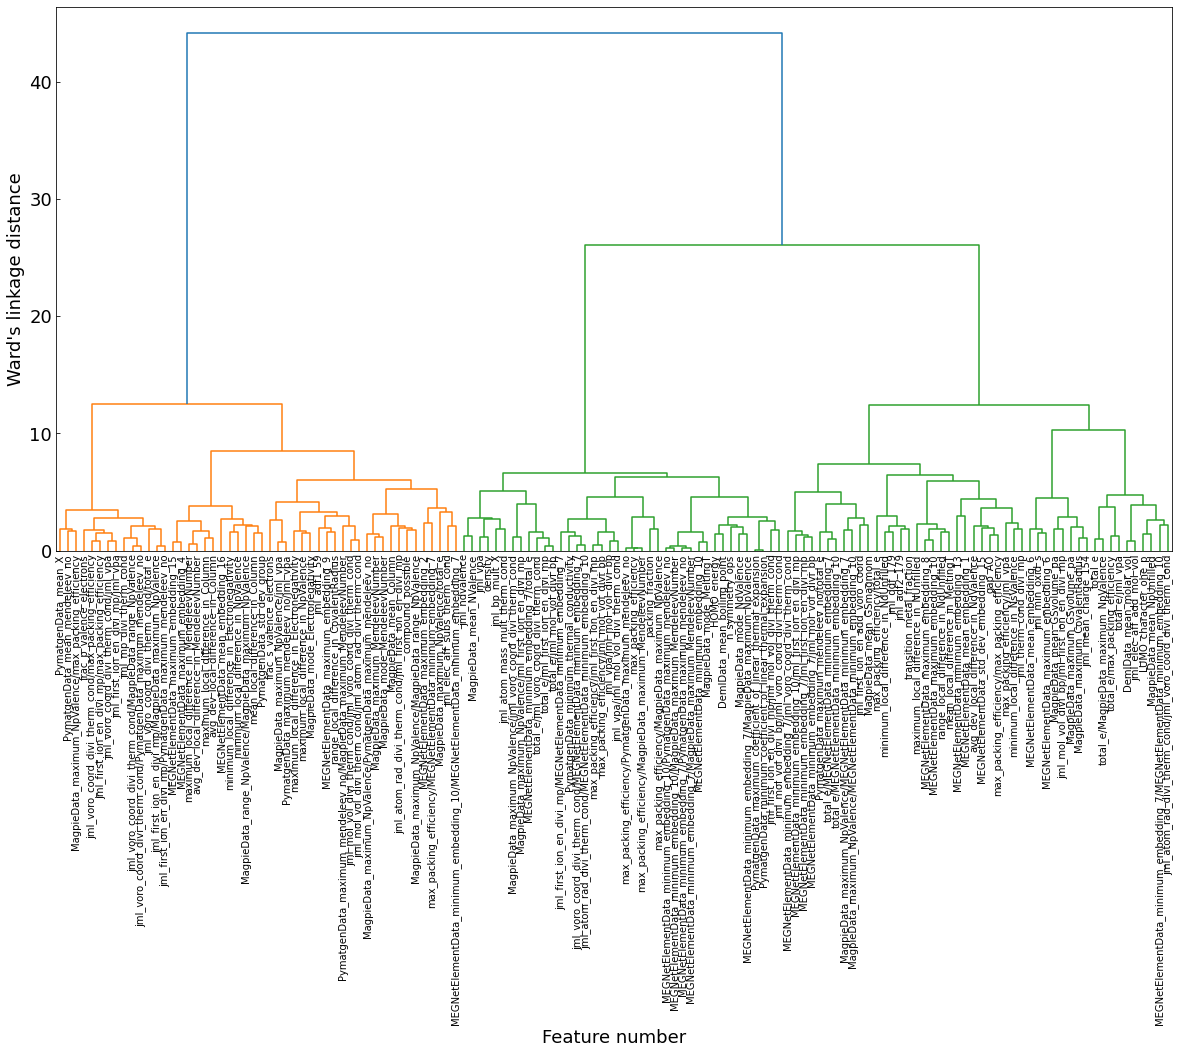

In [5]:
# Perform hierarchical cluster analysis & create the corresponding dendrogram 
data.hierarchical_cluster_analysis()

In [6]:
# Select features based on the given linkage threshold
threshold_list = [1, 2, 3, 4, 5, 6]

for i in threshold_list:
    final_features = data.apply_linkage_threshold(threshold = i)

Number of features remaining:  116
Features saved as features_selected_from_hierarchical_analysis_n_conductivity_threshold_1.pkl
Number of features remaining:  64
Features saved as features_selected_from_hierarchical_analysis_n_conductivity_threshold_2.pkl
Number of features remaining:  33
Features saved as features_selected_from_hierarchical_analysis_n_conductivity_threshold_3.pkl
Number of features remaining:  22
Features saved as features_selected_from_hierarchical_analysis_n_conductivity_threshold_4.pkl
Number of features remaining:  16
Features saved as features_selected_from_hierarchical_analysis_n_conductivity_threshold_5.pkl
Number of features remaining:  11
Features saved as features_selected_from_hierarchical_analysis_n_conductivity_threshold_6.pkl


In [7]:
# threshold_list = np.linspace(3, 4, 6)

# for i in threshold_list:
#     final_features = data.apply_linkage_threshold(threshold = i)

#### Recursive Feature Elimination

In [8]:
import sys
sys.path.insert(1, 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties')

import recursive_feature_elimination as rfe

import joblib
import pandas as pd

In [9]:
# Target
target = 'n_conductivity' 

# Path to training data
path = 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties/6. ricci_boltztrap_mp_tabular (done)/'
path_to_save = path + target + '_results/'
path_to_file = path_to_save + 'df_train_' + target + '_engineered.pkl'

# Features 
features = joblib.load(path_to_save + 'features_selected_from_hierarchical_analysis_' + target + '_threshold_2.pkl')

scaled = False

problem = 'regression'

In [10]:
# Initialize module with path_to_file and path_to_save
run = rfe.recursive_feature_elimination(
                                        path_to_file, 
                                        path_to_save, 
                                        target=target,
                                        features = features,
                                        scaled = False,
                                        problem = problem
                                        )

Target: n_conductivity
No. of features: 64


In [11]:
# Run RFE
estimator = run.base_model(boosting_method = 'lightGBM')
RFE_features = run.perform()

Fitting estimator with 64 features.
Fitting estimator with 63 features.
Fitting estimator with 62 features.
Fitting estimator with 61 features.
Fitting estimator with 60 features.
Fitting estimator with 59 features.
Fitting estimator with 58 features.
Fitting estimator with 57 features.
Fitting estimator with 56 features.
Fitting estimator with 55 features.
Fitting estimator with 54 features.
Fitting estimator with 53 features.
Fitting estimator with 52 features.
Fitting estimator with 51 features.
Fitting estimator with 50 features.
Fitting estimator with 49 features.
Fitting estimator with 48 features.
Fitting estimator with 47 features.
Fitting estimator with 46 features.
Fitting estimator with 45 features.
Fitting estimator with 44 features.
Fitting estimator with 43 features.
Fitting estimator with 42 features.
Fitting estimator with 41 features.
Fitting estimator with 40 features.
Fitting estimator with 39 features.
Fitting estimator with 38 features.
Fitting estimator with 37 fe

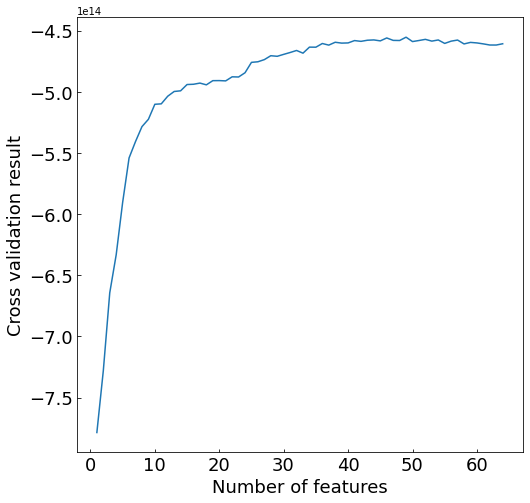

Figure saved as: RFE_plot_n_conductivity.png


In [12]:
# Plot figure
run.RFE_plot()

#### Test Dummy Model

In [13]:
### test result to find best threshold

import pandas as pd
import numpy as np
import joblib
import statsmodels.api as sm
import matplotlib.pyplot as plt

from matplotlib.gridspec import GridSpec
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score, max_error
from sklearn.metrics import explained_variance_score,mean_squared_error
from sklearn.preprocessing import MinMaxScaler

from lightgbm.sklearn import LGBMRegressor

In [14]:
# Target
target = 'n_conductivity' 

# Path to training data
path = 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties/6. ricci_boltztrap_mp_tabular (done)/'
path_to_save = path + target + '_results/'
path_to_file = path_to_save + 'df_train_' + target + '_engineered.pkl'

# Data
df_train = joblib.load(path_to_save + 'df_train_' + target + '_engineered.pkl')
df_test = joblib.load(path_to_save + 'df_test_' + target + '_engineered.pkl')

# Features 
features = joblib.load(path_to_save + 'features_selected_from_hierarchical_analysis_' + target + '_threshold_2.pkl')
scaled = False
print('No. of features:', len(features))

problem = 'regression'

No. of features: 64


In [15]:
# Scale the features
scaling = MinMaxScaler(feature_range=(0, 1))

df_train[features] = pd.DataFrame(
                                    scaling.fit_transform(df_train[features].values),
                                    columns=df_train[features].columns,
                                    index=df_train[features].index
                                )
                                

df_test[features] = pd.DataFrame(
                                    scaling.transform(df_test[features].values),
                                    columns=df_test[features].columns,
                                    index=df_test[features].index
                                )

In [16]:
lgbm = LGBMRegressor(
                    boosting_type ='gbdt',
                    objective='regression',
                    importance_type='gain',
                    learning_rate=0.1,
                    n_estimators=350,
                    num_leaves=40,
                    max_depth=-1,
                    random_state=42
                    )

lgbm.fit(df_train[features], df_train[target].values.ravel())
lgbm

LGBMRegressor(importance_type='gain', n_estimators=350, num_leaves=40,
              objective='regression', random_state=42)

In [17]:
# Predict
predicted_target = lgbm.predict(df_test[features])

# Generate table of results
id_index = df_test.index.tolist()

df_pred = pd.DataFrame({'task_id': id_index,
                        'act_target': df_test[target].values.reshape(1, -1).ravel(),
                        'pred_target': predicted_target
                        })

# Eliminate zeros (?)
df_pred['adj_pred_target'] = df_pred['pred_target']
df_pred['adj_pred_target'] = df_pred['adj_pred_target'].apply(lambda x: 0 if x < 0 else x)

# Define variables
y_test = df_pred['act_target']
y_pred_adj = df_pred['adj_pred_target']
y_pred = df_pred['pred_target']

In [18]:
print('Max value:', df_test[target].max())
print('Min value:', df_test[target].min())

Max value: 9855627191364600.0
Min value: 715.0361635424184


In [19]:
def plot(df_pred, adj=False):
        # Plot results
        max_value = 9999123921578508
        min_value = 0

        X = df_pred['act_target']
        if adj is True:
                Y = df_pred['adj_pred_target']
        else:
                Y = df_pred['pred_target']

        # Stats
        results = sm.OLS(Y,sm.add_constant(X)).fit()
        print(results.summary())

        # Figure
        fig = plt.figure(figsize=(10, 10)) #, dpi=100, facecolor='w', edgecolor='k')
        gs = GridSpec(4, 4)

        ax_scatter = fig.add_subplot(gs[1:4, 0:3])
        ax_hist_y = fig.add_subplot(gs[0,0:3])
        ax_hist_x = fig.add_subplot(gs[1:4, 3])


        fontsize = 18

        # Predicted vs Actual
        ax_scatter.plot(X, Y, 'o', markersize=6, color='black', alpha=0.12)

        offset = 0.15
        # line of best fit
        linear_fit = np.linspace(min_value-offset, max_value-offset, 10)
        ax_scatter.plot(linear_fit, linear_fit*results.params[1] + results.params[0], '-.', color='tab:blue', alpha=0.7)

        # Ideal y=x 
        y = x = np.linspace(min_value-offset, max_value-offset, 10)
        ax_scatter.plot(x, y, '--', color='red', alpha=0.7)

        ticks = np.linspace(min_value, max_value, 5)

        onset = -100000000000
        ax_scatter.set_xlabel('DFT Calculation of Hole Conductivity', fontsize=fontsize)
        ax_scatter.set_ylabel('ML Prediction of Hole Conductivity', fontsize=fontsize)
        ax_scatter.tick_params(axis='both', which='both', labelsize=fontsize, direction="in")
        ax_scatter.set_xlim(min_value-onset, max_value+onset)
        ax_scatter.set_ylim(min_value-onset, max_value+onset)
        ax_scatter.set_xticks(ticks)
        ax_scatter.set_yticks(ticks)

        ax_hist_x.tick_params(axis='both', which='both', labelsize=fontsize, direction="in", labelleft=False)
        ax_hist_x.set_xlabel('Count', fontsize=fontsize)
        ax_hist_x.set_ylim(min_value-onset, max_value+onset)
        ax_hist_x.set_xticks([0, 2500, 5000])
        ax_hist_x.set_yticks(ticks)

        ax_hist_y.tick_params(axis='both', which='both', labelsize=fontsize, direction="in", labelbottom=False)
        ax_hist_y.set_ylabel('Count', fontsize=fontsize)
        ax_hist_y.set_xlim(min_value-onset, max_value+onset)
        ax_hist_y.set_yticks([0, 2000, 4000])
        ax_hist_y.set_xticks(ticks)

        # Distribution plots
        alpha = 0.4
        histtype = 'bar' #'step' bar
        color = 'black' #'tab:grey'
        bins = 60 #70

        ax_hist_y.hist(
                        y_pred_adj, 
                        bins=bins, 
                        color=color, 
                        histtype=histtype,
                        alpha=alpha
                        )
        ax_hist_x.hist(
                        y_test, 
                        orientation='horizontal', 
                        bins=bins, 
                        color=color, 
                        histtype=histtype,
                        alpha=alpha
                        )


        #Text in figure
        font1 = {'family': 'DejaVu Sans',
                'color':  'red',
                'weight': 'normal',
                'size': fontsize-3,
                }

        font2 = {'family': 'DejaVu Sans',
                'color':  'tab:blue',
                'weight': 'normal',
                'size': fontsize-3,
                }

        font3 = {'family': 'DejaVu Sans', #'serif',
                'color':  'black',
                'weight': 'normal',
                'size': fontsize-3,
                }

        plt.show()

        print('m = ', results.params[1])
        print('c = ', results.params[0], '\n')

        print('MAE: ', mean_absolute_error(X, Y))
        print('MSE: ', mean_squared_error(X, Y))
        print('RMSE: ', mean_squared_error(X, Y, squared=False))
        print('R-squared: ', r2_score(X, Y))
        print('Max error: ', max_error(X, Y))
        print('Explained_variance_score: ', explained_variance_score(X, Y, multioutput='variance_weighted'))

                            OLS Regression Results                            
Dep. Variable:            pred_target   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                 4.255e+04
Date:                Sat, 27 Aug 2022   Prob (F-statistic):               0.00
Time:                        10:49:02   Log-Likelihood:            -3.3339e+05
No. Observations:                9514   AIC:                         6.668e+05
Df Residuals:                    9512   BIC:                         6.668e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.721e-16    1.2e-18    226.983      0.0

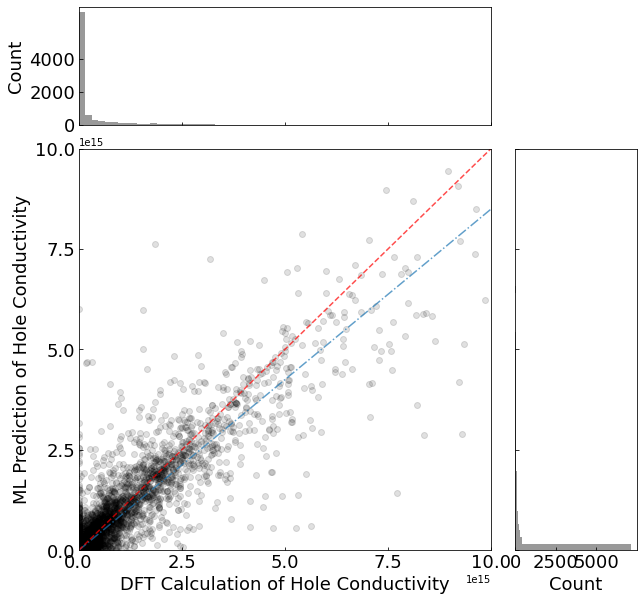

m =  0.849505195255666
c =  2.720541021078664e-16 

MAE:  164368997603555.6
MSE:  1.87498578436581e+29
RMSE:  433011060409062.75
R-squared:  0.822180764123229
Max error:  6414212159523297.0
Explained_variance_score:  0.8221934251416254


In [20]:
plot(df_pred, adj=False)

[Text(0.5, 0, 'Relevance score'), Text(0, 0.5, 'Feature')]

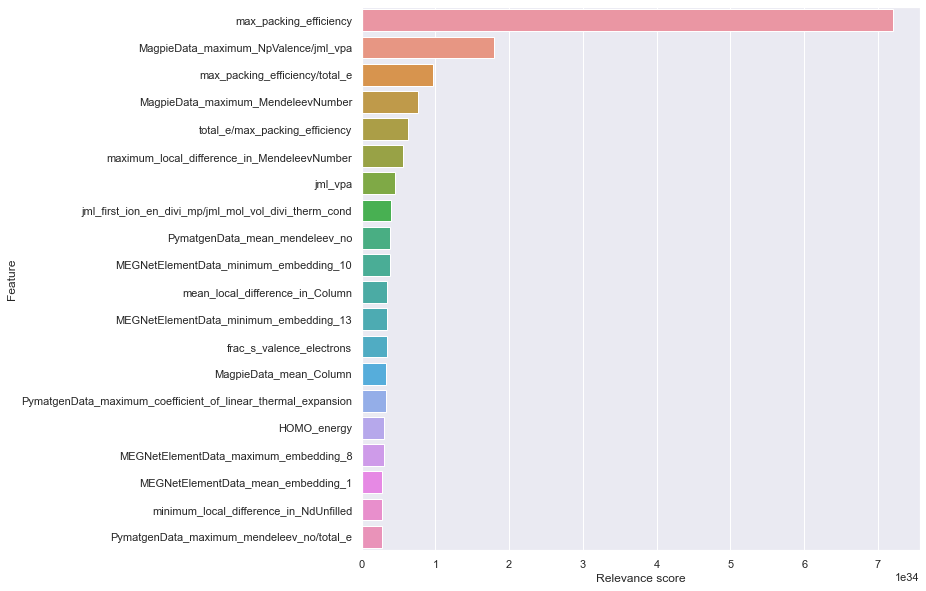

In [21]:
import seaborn as sns

# Generate feature ranking
model = lgbm

feature_score = pd.DataFrame({'feature': features, 'relevance_score': model.feature_importances_})
feature_score = feature_score.sort_values(by = 'relevance_score', ascending = False)
feature_score = feature_score.reset_index(drop = True)


#Plot data of feature relevance 
sns.set(rc = {'figure.figsize':(10, 10)})

# Number of features to plot
no_of_features = 20

fig = sns.barplot(x = 'relevance_score', y = 'feature', data = feature_score[:no_of_features])
fig.set(xlabel = 'Relevance score', ylabel = 'Feature')

#### Bayesian Optimization 

In [1]:
import sys
sys.path.insert(1, 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties')

import optimization as opt

import joblib
import pandas as pd
import numpy as np

In [2]:
# Target
target = 'n_conductivity' 

# Path
path = 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties/6. ricci_boltztrap_mp_tabular (done)/'
path_to_save = path + target + '_results/'

# Path to training data
path_to_train_data = path_to_save + 'df_train_' + target + '_engineered.pkl'
path_to_test_data = path_to_save + 'df_test_' + target + '_engineered.pkl'

path_to_features = path_to_save + 'features_selected_from_RFE_' + target + '.pkl' 

problem = 'regression'

scaled = False

In [3]:
# Initialization
final_stage = opt.optimization(
                            path_to_train_data = path_to_train_data,
                            path_to_test_data = path_to_test_data,
                            path_to_save = path_to_save,
                            features = path_to_features,
                            target = target,
                            problem = problem,
                            scaled = scaled
                            )

Name of target column:  n_conductivity
No. of exploratory features:  49


In [4]:
# Choose ML model
final_stage.base_model(boosting_method = 'lightGBM')

LGBMRegressor(importance_type='gain', random_state=42)

In [5]:
# Define hyperparameters; range should be edited directly from the script
final_stage.set_hyperparameters()

(['learning_rate', 'n_estimators', 'num_leaves'],
 [Real(low=0.01, high=1.0, prior='log-uniform', transform='identity'),
  Integer(low=100, high=800, prior='uniform', transform='identity'),
  Integer(low=10, high=100, prior='uniform', transform='identity')])

In [6]:
# optimization_method: dummy_minimize, gp_minimize, gbrt_minimize, forest_minimize
final_stage.run(optimization_method = 'bayesian')

Iteration No: 1 started. Evaluating function at random point.

 {'learning_rate': 0.04273079177557485, 'n_estimators': 795, 'num_leaves': 29} 

Score:  427982780239037.25 

Iteration No: 1 ended. Evaluation done at random point.
Time taken: 7.6289
Function value obtained: 427982780239037.2500
Current minimum: 427982780239037.2500
Iteration No: 2 started. Evaluating function at random point.

 {'learning_rate': 0.20243684144662302, 'n_estimators': 777, 'num_leaves': 11} 

Score:  445260382939997.6 

Iteration No: 2 ended. Evaluation done at random point.
Time taken: 4.4040
Function value obtained: 445260382939997.6250
Current minimum: 427982780239037.2500
Iteration No: 3 started. Evaluating function at random point.

 {'learning_rate': 0.024572379251803004, 'n_estimators': 433, 'num_leaves': 37} 

Score:  447600220884132.5 

Iteration No: 3 ended. Evaluation done at random point.
Time taken: 4.6863
Function value obtained: 447600220884132.5000
Current minimum: 427982780239037.2500
Itera

Saved: Optimisation_result_n_conductivity.png


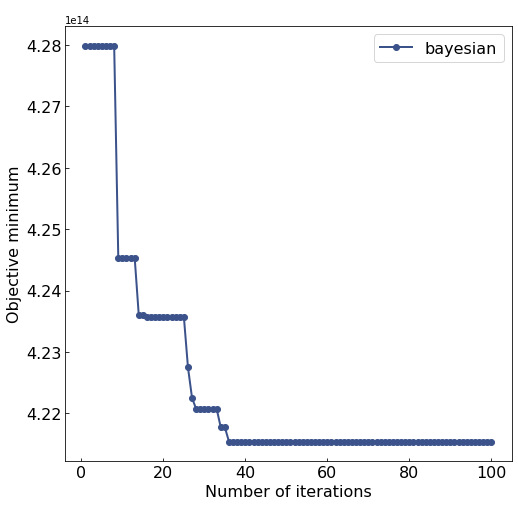

In [7]:
# Plot convergence plot
final_stage.convergence_plot()

<Figure size 720x720 with 0 Axes>

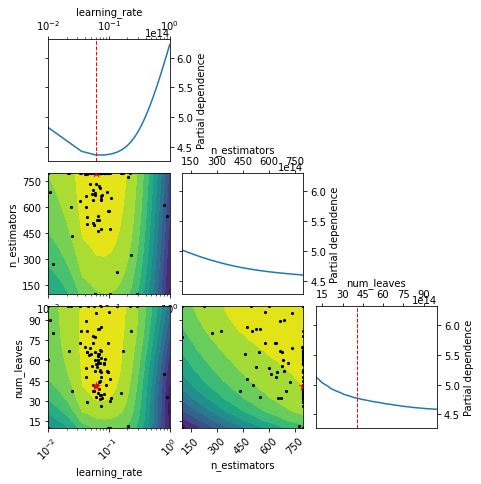

<Figure size 720x720 with 0 Axes>

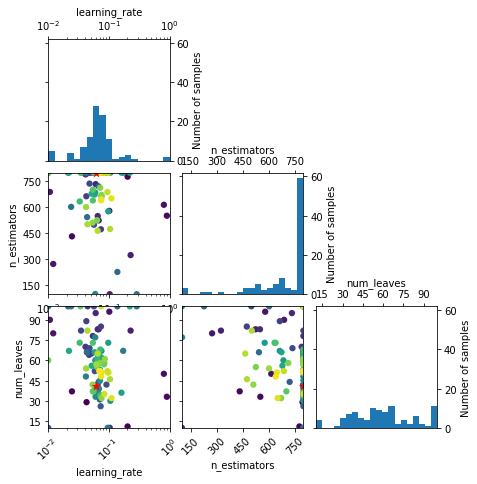

In [8]:
# objective and evaluation plot
final_stage.objective_plot()

<Figure size 720x720 with 0 Axes>

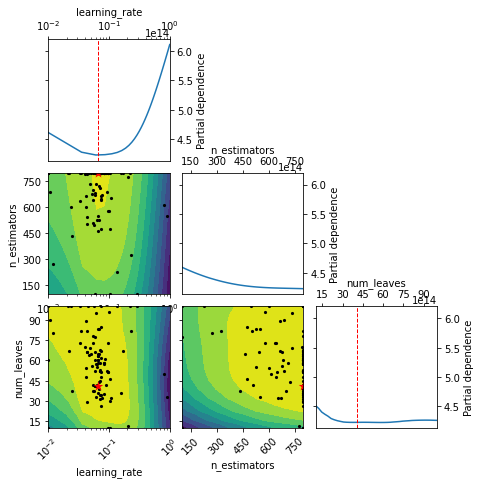

In [9]:
# objective and evaluation plot # expected_minimum_random, expected_minimum
final_stage.objective_plot_adjust(sample_source='expected_minimum', minimum='expected_minimum', n_minimum_search=2)

In [10]:
# Train model with optimal hyperparameter identified
final_stage.train_model()

LGBMRegressor(importance_type='gain', learning_rate=0.06010078274226252,
              n_estimators=800, num_leaves=41, random_state=42)

                            OLS Regression Results                            
Dep. Variable:            pred_target   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                 4.461e+04
Date:                Sat, 27 Aug 2022   Prob (F-statistic):               0.00
Time:                        11:01:07   Log-Likelihood:            -3.3324e+05
No. Observations:                9514   AIC:                         6.665e+05
Df Residuals:                    9512   BIC:                         6.665e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           2.738e-16   1.18e-18    232.

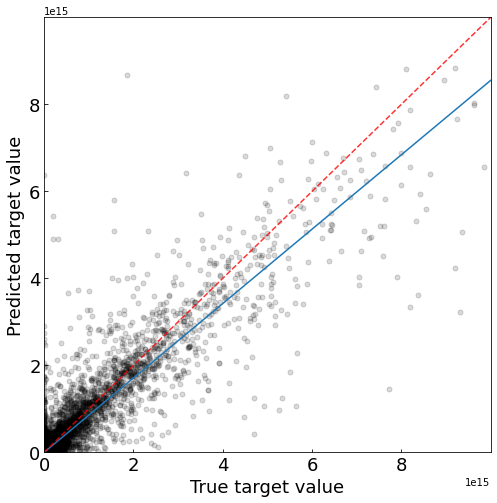

Saved: regression_plot_n_conductivity.png


In [11]:
# Evaluate model using test set
final_stage.evaluate(
                    strategy = 'weighted', 
                    adjusted = False, 
                    max_value = 9999123921578508,
                    min_value = 0
                    )


### Final Figure

In [1]:
import pandas as pd
import numpy as np
import joblib
import statsmodels.api as sm
import matplotlib.pyplot as plt

from matplotlib.gridspec import GridSpec
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score, max_error
from sklearn.metrics import explained_variance_score,mean_squared_error

from lightgbm.sklearn import LGBMRegressor

In [2]:
# Target
target = 'n_conductivity'

# Path
path = 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties/6. ricci_boltztrap_mp_tabular (done)/'
path_to_save = path + target + '_results/'

# Features
features = joblib.load(path_to_save + 'features_selected_from_RFE_' + target + '.pkl')
print(len(features))

# Path to training data
df_train = joblib.load(path_to_save + 'df_train_' + target + '_engineered.pkl')
df_test = joblib.load(path_to_save + 'df_test_' + target + '_engineered.pkl')

problem = 'regression'

scaled = False

49


In [3]:
LGBMRegressor(importance_type='gain', learning_rate=0.06010078274226252,
              n_estimators=800, num_leaves=41, random_state=42)

LGBMRegressor(importance_type='gain', learning_rate=0.06010078274226252,
              n_estimators=800, num_leaves=41, random_state=42)

In [4]:
lgbm = LGBMRegressor(
                    boosting_type ='gbdt',
                    objective=problem,
                    importance_type='gain',
                    learning_rate=0.06010078274226252,
                    n_estimators=800,
                    num_leaves=41,
                    max_depth=-1,
                    random_state=42
                    )

lgbm.fit(df_train[features], df_train[target].values.ravel())
lgbm

LGBMRegressor(importance_type='gain', learning_rate=0.06010078274226252,
              n_estimators=800, num_leaves=41, objective='regression',
              random_state=42)

In [5]:
# Predict
predicted_target = lgbm.predict(df_test[features])

# Generate table of results
id_index = df_test.index.tolist()

df_pred = pd.DataFrame({'task_id': id_index,
                        'act_target': df_test[target].values.reshape(1, -1).ravel(),
                        'pred_target': predicted_target
                        })
df_pred['adj_pred_target'] = df_pred['pred_target']
df_pred['adj_pred_target'] = df_pred['adj_pred_target'].apply(lambda x: 0 if x < 0 else x)

# Define variables
y_test = df_pred['act_target']
y_pred_adj = df_pred['adj_pred_target']
y_pred = df_pred['pred_target']

In [6]:
print('Max value:', df_test[target].max())
print('Min value:', df_test[target].min())

Max value: 9855627191364600.0
Min value: 715.0361635424184


In [7]:
def plot(df_pred, adj=False):
        # Plot results
        max_value = 9999123921578508
        min_value = 0

        X = df_pred['act_target']
        if adj is True:
                Y = df_pred['adj_pred_target']
        else:
                Y = df_pred['pred_target']

        # Stats
        results = sm.OLS(Y,sm.add_constant(X)).fit()
        print(results.summary())

        # Figure
        fig = plt.figure(figsize=(10, 10), dpi=500) #, dpi=100, facecolor='w', edgecolor='k')
        gs = GridSpec(4, 4)

        ax_scatter = fig.add_subplot(gs[1:4, 0:3])
        ax_hist_y = fig.add_subplot(gs[0,0:3])
        ax_hist_x = fig.add_subplot(gs[1:4, 3])


        fontsize = 18

        # Predicted vs Actual
        ax_scatter.plot(X, Y, 'o', markersize=6, color='black', alpha=0.1)

        offset = 0.15
        # line of best fit
        linear_fit = np.linspace(min_value-offset, max_value-offset, 10)
        ax_scatter.plot(linear_fit, linear_fit*results.params[1] + results.params[0], '-.', color='tab:blue', alpha=0.7)

        # Ideal y=x 
        y = x = np.linspace(min_value-offset, max_value-offset, 10)
        ax_scatter.plot(x, y, '--', color='red', alpha=0.7)

        ticks = np.linspace(min_value, max_value, 5)

        onset = -10000
        ax_scatter.set_xlabel('DFT Calculation of n-type Electronic \n Thermal Conductivity (W/K/m/s)', fontsize=fontsize)
        ax_scatter.set_ylabel('ML Prediction of n-type Electronic \n Thermal Conductivity (W/K/m/s)', fontsize=fontsize)
        ax_scatter.tick_params(axis='both', which='both', labelsize=fontsize, direction="in")
        ax_scatter.set_xlim(min_value-onset, max_value+onset)
        ax_scatter.set_ylim(min_value-onset, max_value+onset)
        ax_scatter.set_xticks(ticks)
        ax_scatter.set_yticks(ticks)
        
        plt.setp(ax_scatter.get_yticklabels()[0], visible=False)
        
        #ax_scatter.autoscale(True)

        ax_hist_x.tick_params(axis='both', which='both', labelsize=fontsize, direction="in", labelleft=False)
        ax_hist_x.set_xlabel('Count', fontsize=fontsize)
        ax_hist_x.set_ylim(min_value-onset, max_value+onset)
        ax_hist_x.set_xticks([0, 2500, 5000])
        ax_hist_x.set_yticks(ticks)

        ax_hist_y.tick_params(axis='both', which='both', labelsize=fontsize, direction="in", labelbottom=False)
        ax_hist_y.set_ylabel('Count', fontsize=fontsize)
        ax_hist_y.set_xlim(min_value-onset, max_value+onset)
        ax_hist_y.set_yticks([0, 2000, 4000])
        ax_hist_y.set_xticks(ticks)

        # Distribution plots
        alpha = 0.4
        histtype = 'bar' #'step' bar
        color = 'black' #'tab:grey'
        bins = 60 #70

        ax_hist_y.hist(
                        y_pred_adj, 
                        bins=bins, 
                        color=color, 
                        histtype=histtype,
                        alpha=alpha
                        )
        ax_hist_x.hist(
                        y_test, 
                        orientation='horizontal', 
                        bins=bins, 
                        color=color, 
                        histtype=histtype,
                        alpha=alpha
                        )


        #Text in figure
        font1 = {'family': 'DejaVu Sans',
                'color':  'red',
                'weight': 'normal',
                'size': fontsize-3,
                }

        font2 = {'family': 'DejaVu Sans',
                'color':  'tab:blue',
                'weight': 'normal',
                'size': fontsize-3,
                }

        font3 = {'family': 'DejaVu Sans', #'serif',
                'color':  'black',
                'weight': 'normal',
                'size': fontsize-3,
                }

        ax_scatter.text(5e15, 6.2e15, r'$y = x$', fontdict=font1)
        ax_scatter.text(6.8e15, 4.7e15, r'$y = ' + str(round(results.params[1],1)) + 'x - ' + str(round(results.params[0],1)) + '$', fontdict=font2)

        
        x = 4.5e15
        y = 0.25e15
        
        r2 = r2_score(X, Y)
        ax_scatter.text(x, y + 0.9e15, r'$R^{2}$ = ' + str(round(r2,2)), fontdict=font3)

        mae = mean_absolute_error(X, Y)
        ax_scatter.text(x, y + 0.48e15, r'$MAE$ = ' + str('{:.2e}'.format(round(mae,2))) + ' (W/K/m/s)', fontdict=font3)

        mse = mean_squared_error(X, Y, squared=False)
        ax_scatter.text(x, y, r'$RMSE$ = ' + str('{:.2e}'.format(round(mse,2))) + ' (W/K/m/s)', fontdict=font3)

        #final_figure
        #fig.savefig('final_regression_mag_v1.png', dpi = 500, bbox_inches="tight")

        plt.show()

        print('m = ', results.params[1])
        print('c = ', results.params[0], '\n')

        print('MAE: ', mean_absolute_error(X, Y))
        print('MSE: ', mean_squared_error(X, Y))
        print('RMSE: ', mean_squared_error(X, Y, squared=False))
        print('R-squared: ', r2_score(X, Y))
        print('Max error: ', max_error(X, Y))
        print('Explained_variance_score: ', explained_variance_score(X, Y, multioutput='variance_weighted'))

                            OLS Regression Results                            
Dep. Variable:        adj_pred_target   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                 4.482e+04
Date:                Sat, 27 Aug 2022   Prob (F-statistic):               0.00
Time:                        11:04:49   Log-Likelihood:            -3.3313e+05
No. Observations:                9514   AIC:                         6.663e+05
Df Residuals:                    9512   BIC:                         6.663e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        2.72e-16   1.17e-18    233.200      0.0

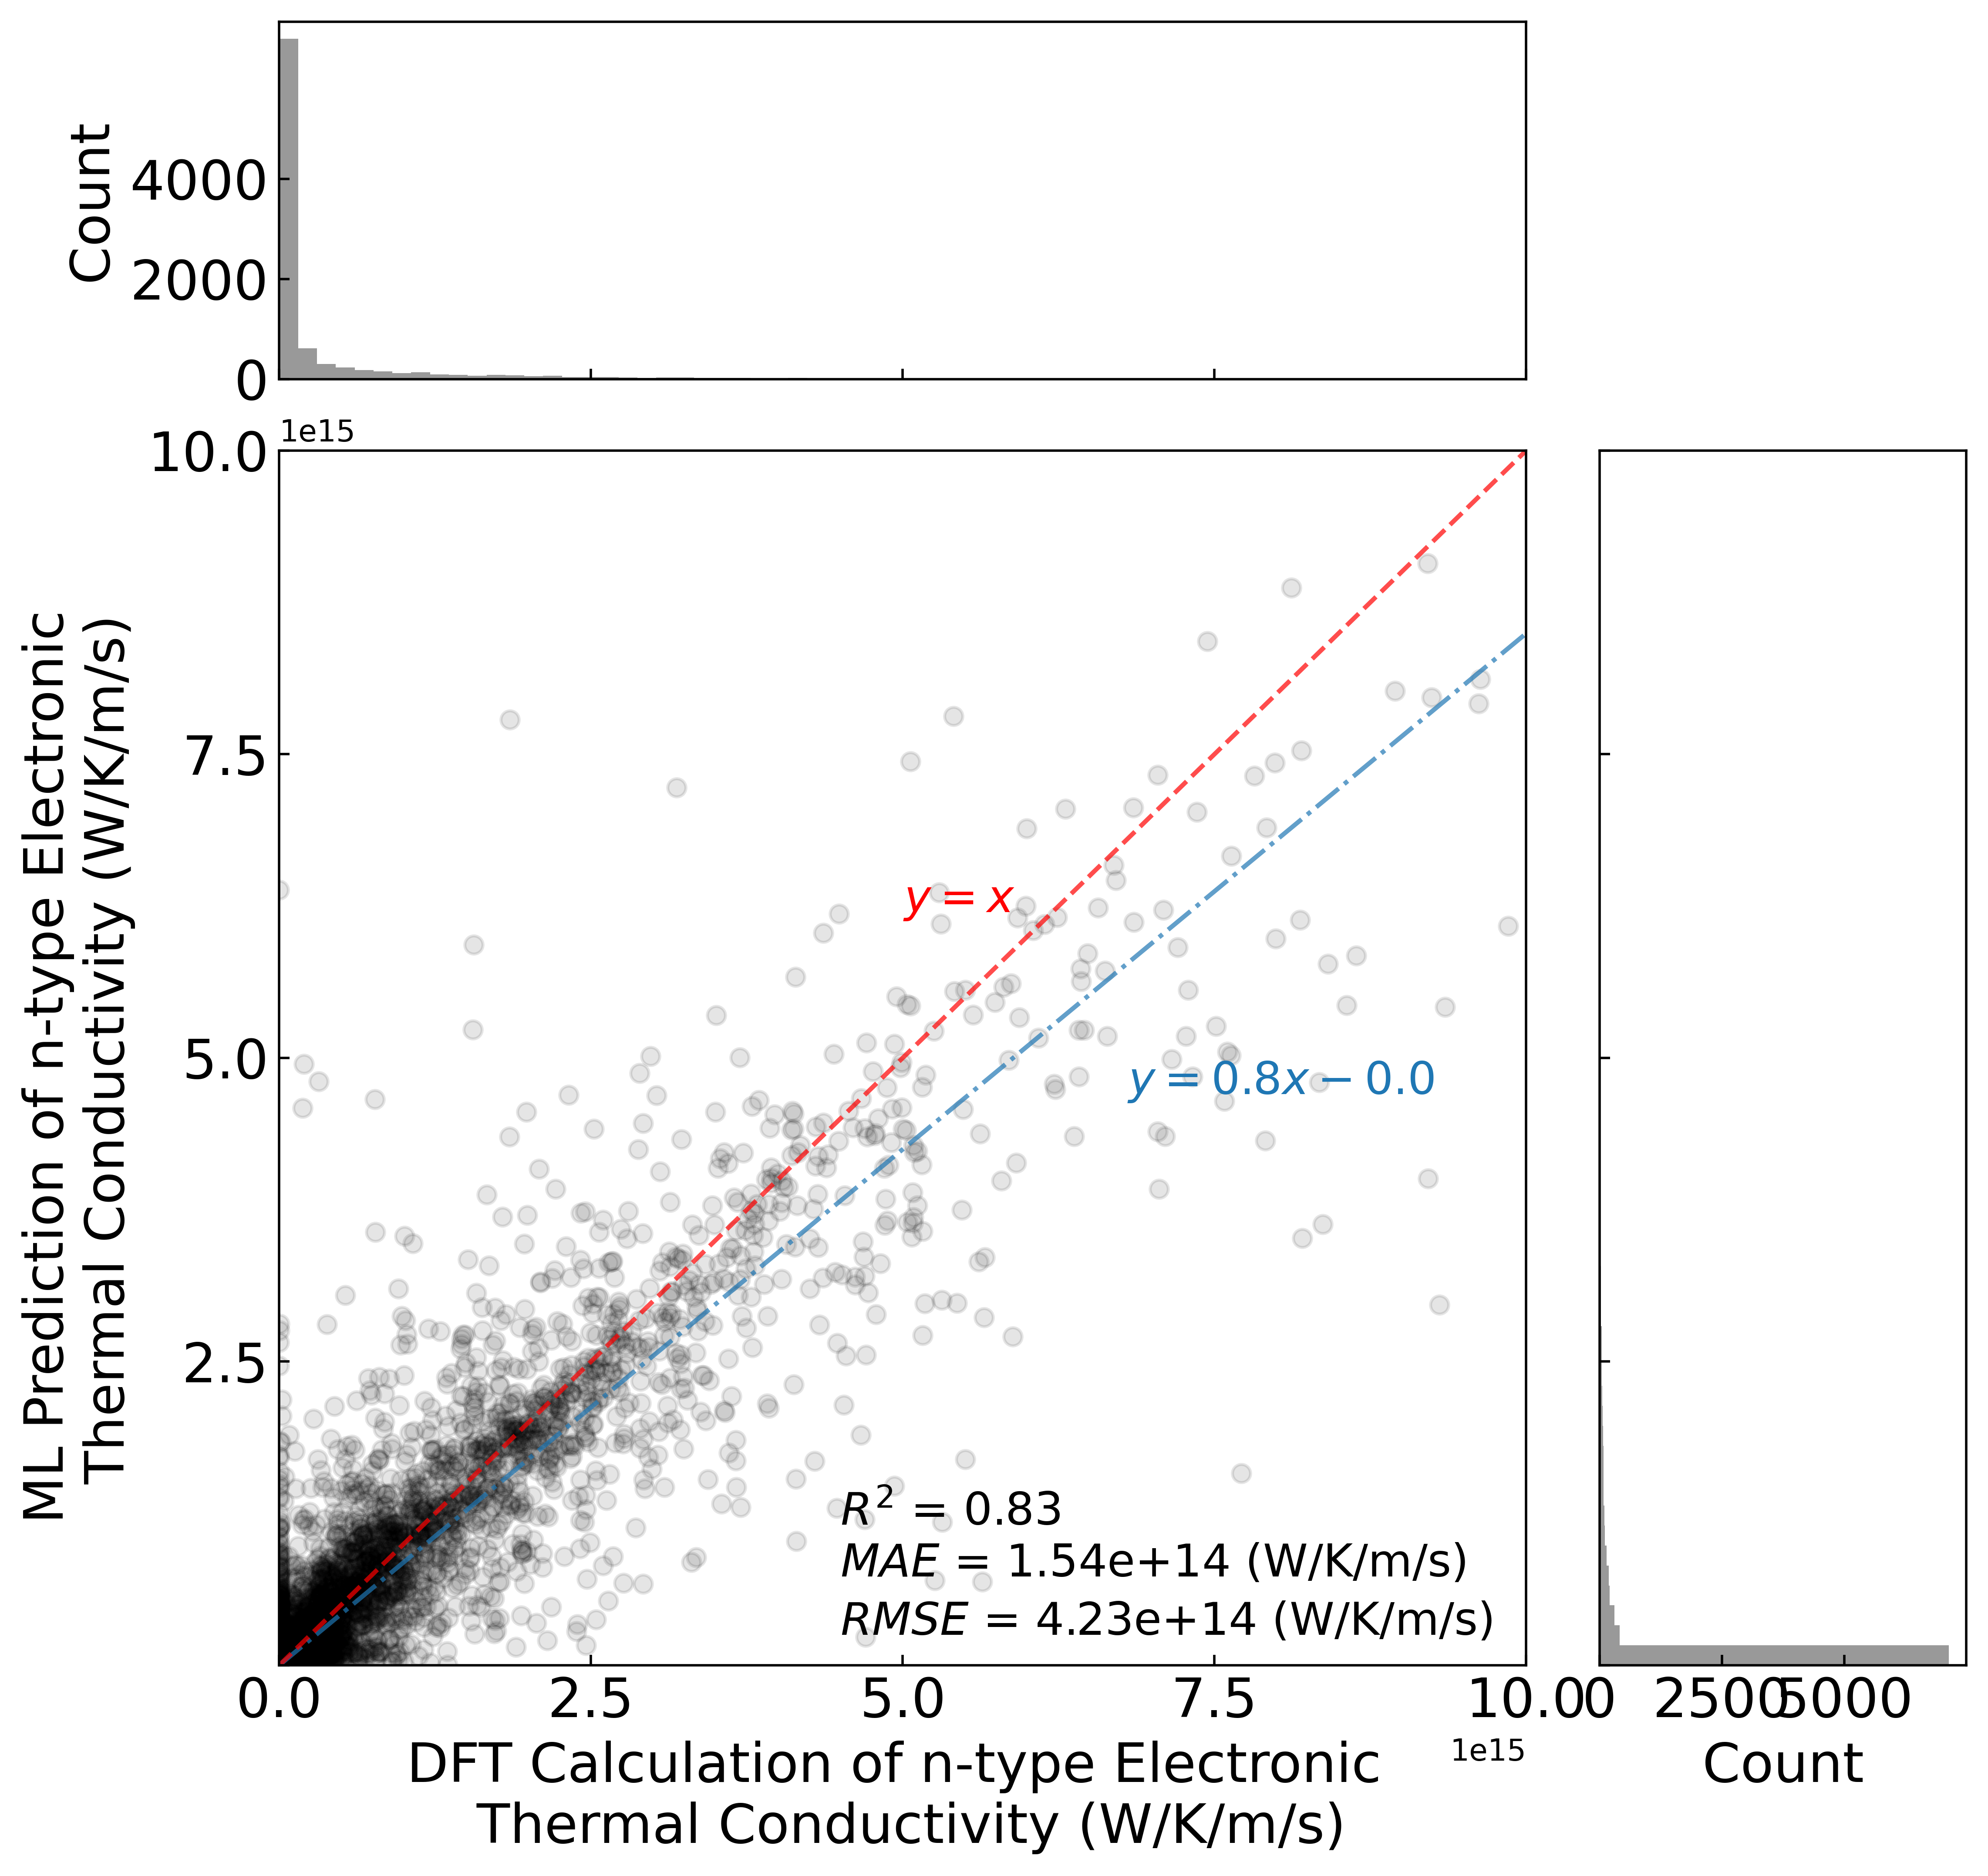

m =  0.8494564715199948
c =  2.720384983278857e-16 

MAE:  153825723391602.8
MSE:  1.7906776004207778e+29
RMSE:  423163987175276.75
R-squared:  0.8301763537283708
Max error:  6383427825717743.0
Explained_variance_score:  0.8302039300612769


In [8]:
plot(df_pred, adj=True)

[Text(0.5, 0, 'Relevance score'), Text(0, 0.5, 'Feature')]

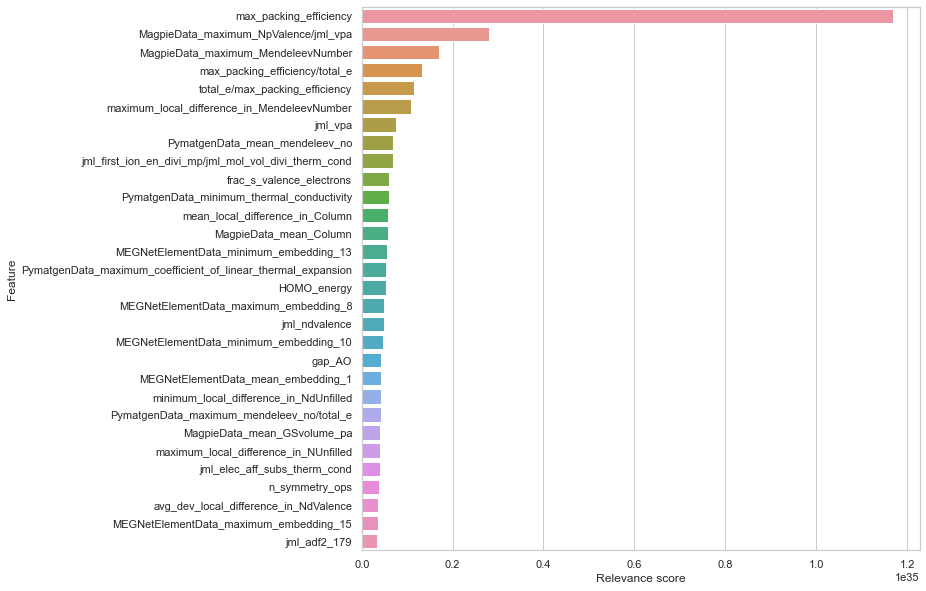

In [9]:
import seaborn as sns

# Generate feature ranking
model = lgbm

feature_score = pd.DataFrame({'feature': features, 'relevance_score': model.feature_importances_})
feature_score = feature_score.sort_values(by = 'relevance_score', ascending = False)
feature_score = feature_score.reset_index(drop = True)

#Plot data of feature relevance 
sns.set(rc = {'figure.figsize':(10, 10)})
sns.set_style("whitegrid")

# Number of features to plot
no_of_features = 30

fig = sns.barplot(x = 'relevance_score', y = 'feature', data = feature_score[:no_of_features])
fig.set(xlabel = 'Relevance score', ylabel = 'Feature')

# plt.savefig('feature_relevance_plot_experimental_bayesian_scaffold_split_v2.png', dpi = 300)